In [1]:
# Step 1: Install Qiskit (only once per new Colab runtime)
!pip install qiskit qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00


In [3]:
# Step 2: Import libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

In [5]:
# Step 3: Define QFT
def qft(circuit, n):
    """Apply QFT on the first n qubits in the circuit."""
    for qubit in range(n):
        circuit.h(qubit)
        for k in range(1, n - qubit):
            angle = np.pi / (2**k)
            circuit.cp(angle, qubit + k, qubit)  # controlled phase
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)

# Step 4: Build circuit
n = 3
qc = QuantumCircuit(n)

# Encode |5> = |101>
qc.x(0)
qc.x(2)

# Apply QFT
qft(qc, n)

# Save statevector
qc.save_statevector()

# Show circuit
print(qc.draw())

# Step 5: Simulate
sim = AerSimulator(method='statevector')
tqc = transpile(qc, sim)
result = sim.run(tqc).result()
statevector = result.data(0)["statevector"]

print("\nStatevector after QFT:")
print(statevector)

     ┌───┐┌───┐                                         statevector 
q_0: ┤ X ├┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘└───┘ │P(π/2)  │       ┌───┐               │       ░      
q_1: ───────────■────────┼───────┤ H ├─■─────────────┼───────░──────
     ┌───┐               │P(π/4) └───┘ │P(π/2) ┌───┐ │       ░      
q_2: ┤ X ├───────────────■─────────────■───────┤ H ├─X───────░──────
     └───┘                                     └───┘         ░      

Statevector after QFT:
Statevector([ 3.53553391e-01-4.32978028e-17j,
             -2.50000000e-01-2.50000000e-01j,
              6.49467042e-17+3.53553391e-01j,
              2.50000000e-01-2.50000000e-01j,
             -3.53553391e-01+4.32978028e-17j,
              2.50000000e-01+2.50000000e-01j,
             -6.49467042e-17-3.53553391e-01j,
             -2.50000000e-01+2.50000000e-01j],
            dims=(2, 2, 2))


In [6]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


Measurement results: {np.str_('000'): np.float64(0.125), np.str_('001'): np.float64(0.125), np.str_('010'): np.float64(0.125), np.str_('011'): np.float64(0.125), np.str_('100'): np.float64(0.125), np.str_('101'): np.float64(0.125), np.str_('110'): np.float64(0.125), np.str_('111'): np.float64(0.125)}


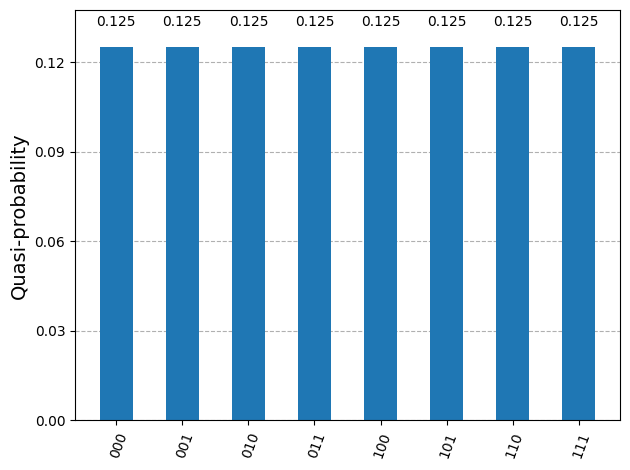

In [9]:
# Get counts
counts = result.get_counts()
print("\nMeasurement results:", counts)

# Step 6: histogram to display in Colab
plot_histogram(counts)